# Read image

In [37]:
from skimage import io
from PIL import Image
import numpy as np

In [38]:
#image_path = '../../GoogleEarthEngine/Images_landsat/Image 2013_10.png'
image_path = '../../GoogleEarthEngine/patches/2015/5/Image 2015_5_26.png'

In [39]:
# With skimage
#im = io.imread(image_path)
# With PIL
im = np.array(Image.open(image_path))
im.shape

(256, 256, 3)

# See the image

<p align="center">
  <img src="https://www.researchgate.net/profile/Bakenaz-Zeidan/publication/327212711/figure/tbl3/AS:668486690934791@1536391055484/Landsat-8-Bands-Designations.png" width="500" height="400">
</p>


# RGB image

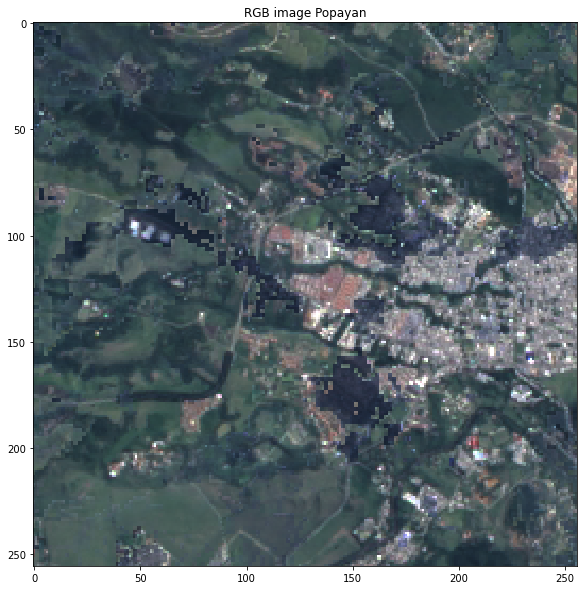

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.imshow(im, interpolation='nearest')
plt.title('RGB image Popayan')

plt.show()

# Data Preparation

In [41]:
flatten_image = im.reshape((im.shape[0] * im.shape[1], im.shape[2]))
flatten_image.shape

(65536, 3)

# Train Model

In [42]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type="tied")
gmm = gmm.fit(flatten_image)


# Generate Cluster

In [43]:
import numpy as np

segmented_image = gmm.predict(flatten_image)
segmented_image = segmented_image.reshape(im.shape[0], im.shape[1])

# See Cluster

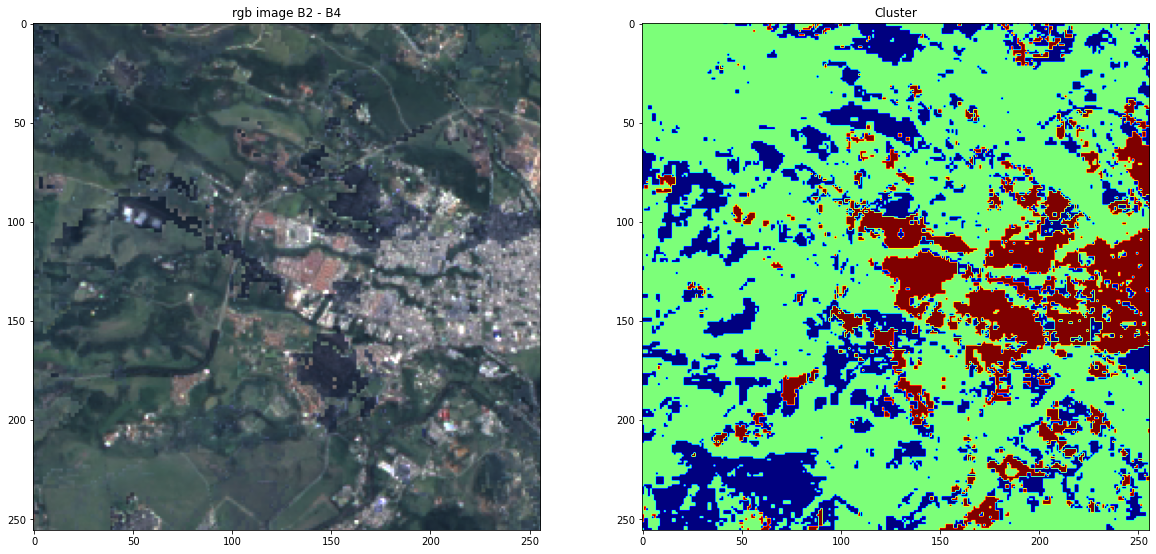

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,15))

axs[0].set_title('rgb image B2 - B4')
axs[0].imshow(im[:,:,:3])

axs[1].set_title('Cluster')
axs[1].imshow(segmented_image, cmap='jet')

plt.show()